In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

In [47]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [48]:
train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [49]:
test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [50]:
value = test["id"]

# Explanation of Columns
1. id: Unique identifier for each record (region, scenario, etc.).

2. MonsoonIntensity: Represents the severity or intensity of the monsoon season, rated on a scale (e.g., 1–10). Higher values indicate stronger monsoons, which may increase flood risk.

3. TopographyDrainage: A measure of the land's slope and how well water is drained. Steeper or poorly drained regions may face higher flood risks.

4. RiverManagement: Refers to actions taken to manage rivers (e.g., construction of levees, embankments). Higher scores may reflect better management, which can reduce flood risk.

5. Deforestation: Rating of the level of deforestation in the region. Higher values indicate greater deforestation, which increases runoff and flood risk due to the loss of natural water absorption.

6. Urbanization: Measures the degree of urban development, which typically increases impermeable surfaces (like concrete) and leads to higher flood risk.

7. ClimateChange: Captures the effects of climate change, such as rising temperatures and changing weather patterns, which may increase the likelihood of extreme weather events like floods.

8. DamsQuality: Represents the structural integrity and quality of dams. Low-quality dams may fail during floods, exacerbating the situation.

Siltation: Measures the accumulation of silt in rivers or reservoirs, which reduces their capacity to hold water, increasing flood risk.

9. AgriculturalPractices: Refers to farming methods that may either mitigate or worsen flood risk. Poor practices such as over-irrigation or excessive land clearance could increase soil erosion and runoff.

10. Encroachments: Refers to unauthorized or illegal development (buildings, settlements) in flood-prone areas, increasing the vulnerability to floods.

11. IneffectiveDisasterPreparedness: Reflects the region's capacity for disaster preparedness, including early warning systems and emergency response plans. A high score indicates inadequate measures.

12. DrainageSystems: Evaluates the effectiveness of urban and rural drainage systems in preventing water accumulation. Poor drainage systems can lead to flooding even during moderate rainfall.

13. CoastalVulnerability: Rates the region's vulnerability to coastal flooding due to factors like rising sea levels and storm surges. Coastal regions may have higher flood risks depending on their preparedness.

14. Landslides: Measures the risk of landslides in the area, which can be triggered by heavy rainfall and further complicate flood management.

15. Watersheds: Indicates the health and management of the watersheds, which are crucial for controlling water flow. Poor watershed management can increase flood risks.

16. DeterioratingInfrastructure: Rates the condition of the region's infrastructure (roads, bridges, etc.). Poor infrastructure may not withstand heavy rains and flooding, exacerbating risks.

17. PopulationScore: An index reflecting the population density. High population density can lead to higher impacts of flooding on human life and property.

18. WetlandLoss: Measures the degree of wetland destruction or degradation. Wetlands act as natural flood buffers, so their loss increases flood vulnerability.

19. InadequatePlanning: Reflects the quality of urban and regional planning. Poor planning (e.g., building in floodplains) can significantly increase flood risk.

20. PoliticalFactors: Refers to the influence of political decisions on flood prevention and management, such as government policies, corruption, and resource allocation. Poor political governance can lead to inefficient flood management strategies.

21. FloodProbability: The target variable, representing the probability or likelihood of a flood occurring, based on the values of all the other factors. This is likely a predicted value based on a model.

In [51]:
train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [52]:
test.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [53]:
X_train = train.drop(columns=["FloodProbability","id"])
Y_train = train["FloodProbability"]
X_test = test.drop(columns=["id"])

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


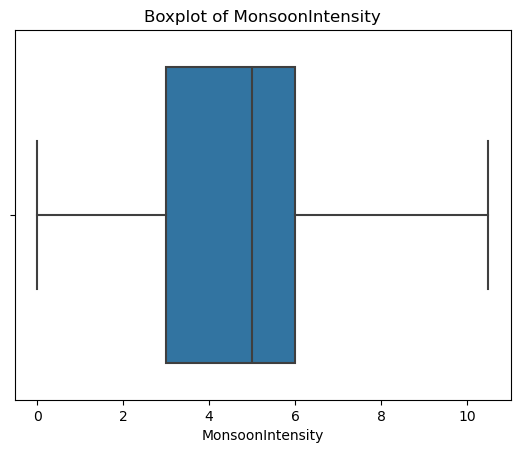

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


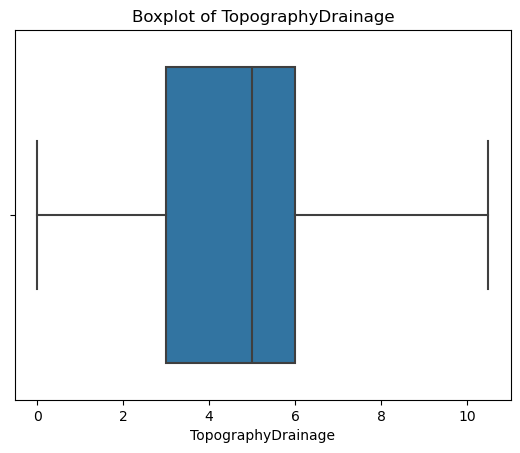

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


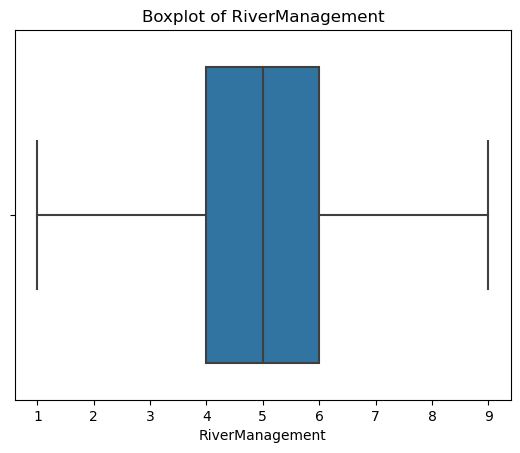

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


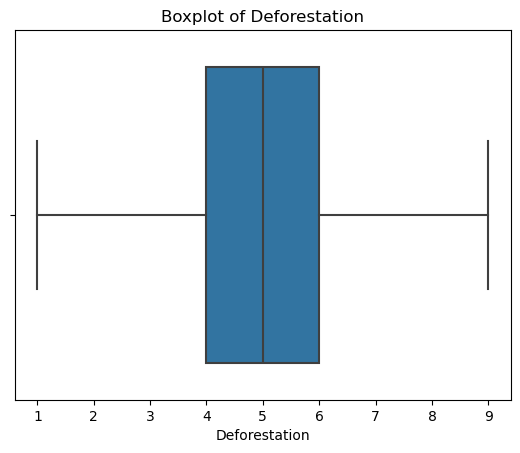

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


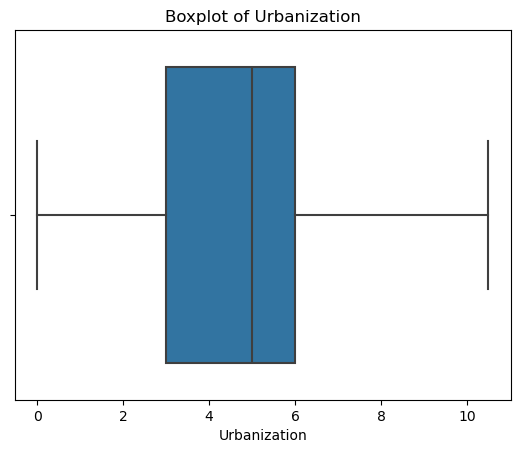

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


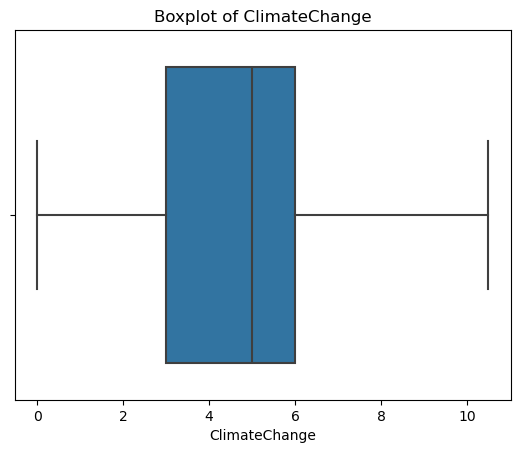

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


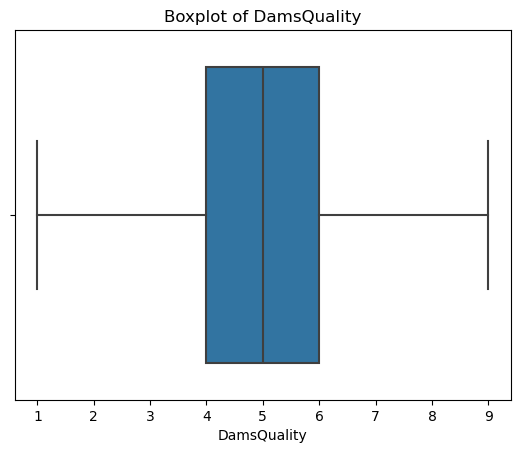

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


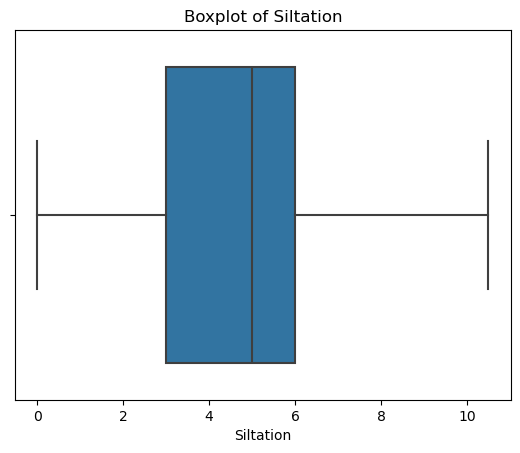

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


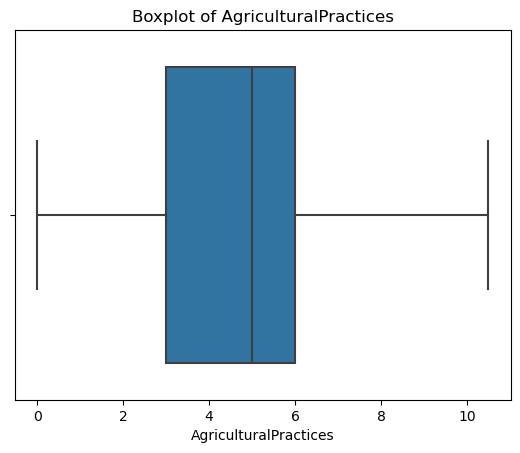

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


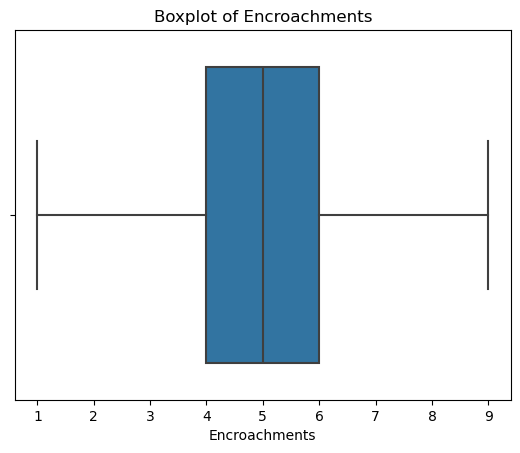

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


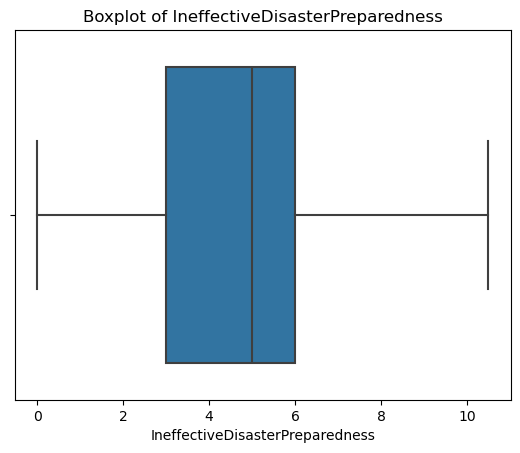

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


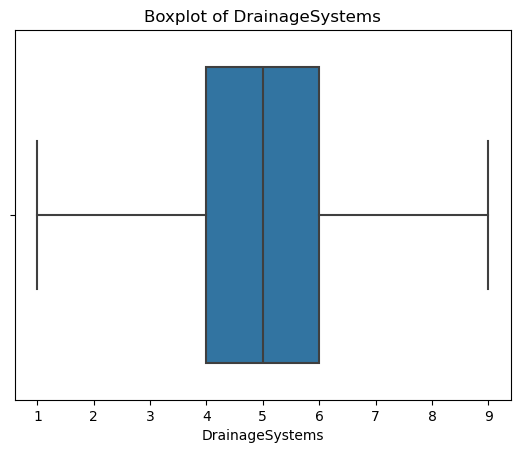

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


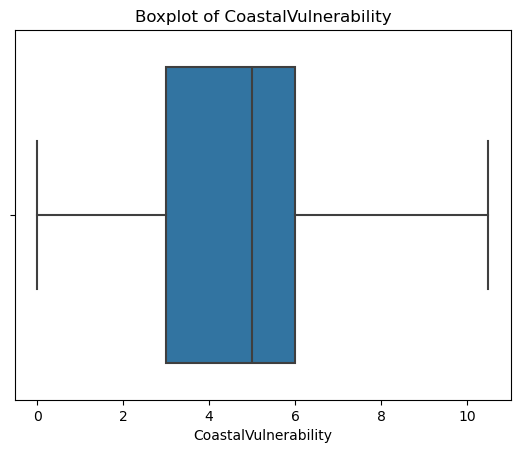

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


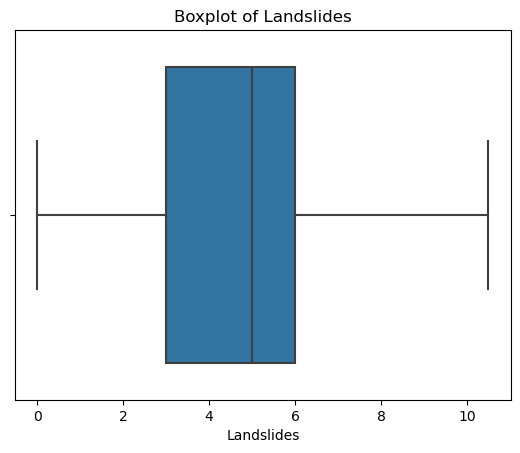

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


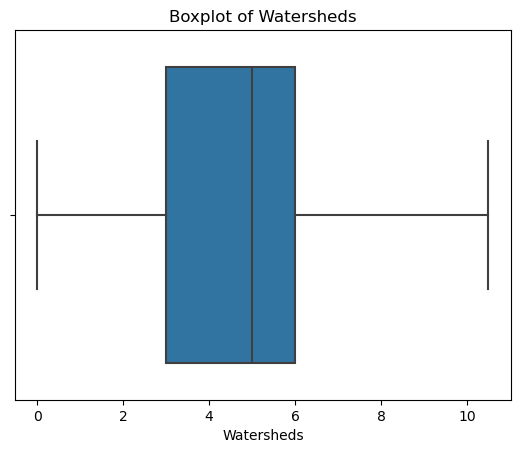

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


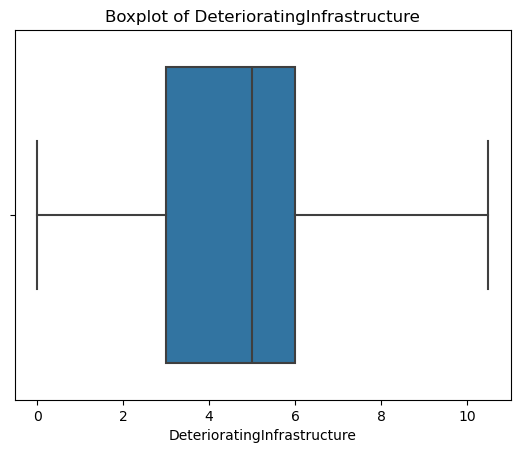

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


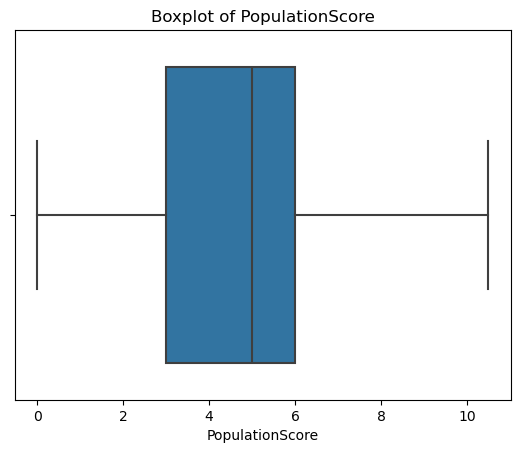

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


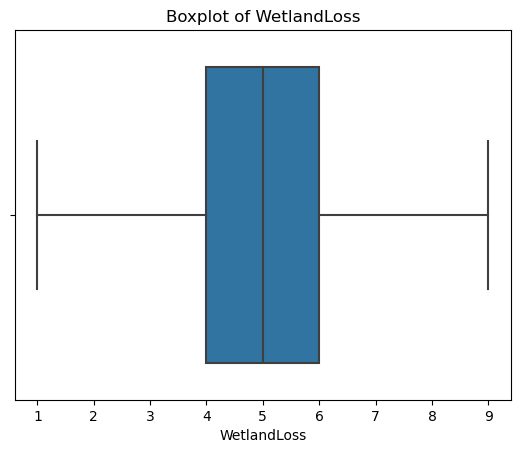

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


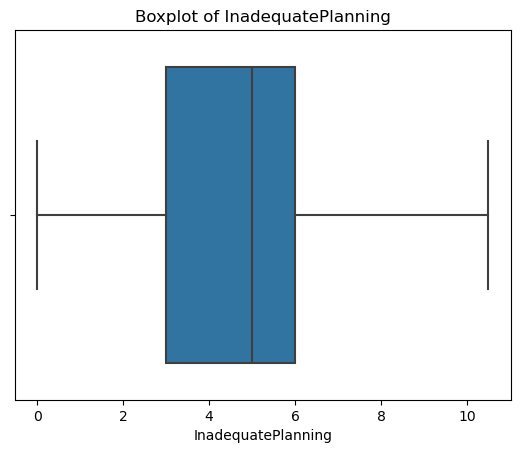

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


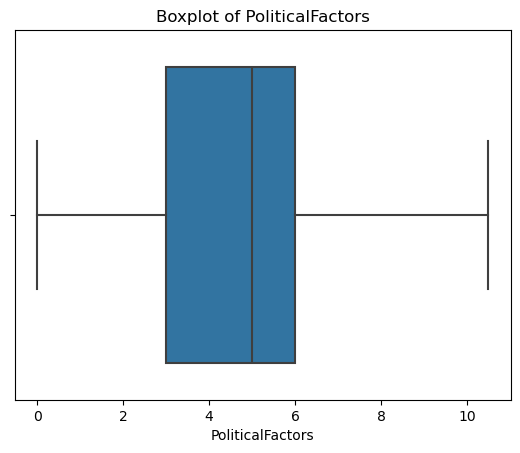

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def handle_outliers(column):
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

    lbound = Q1 - 1.5 * IQR
    ubound = Q3 + 1.5 * IQR
    print(f"Lower Bound: {lbound}, Upper Bound: {ubound}")

    X_train[column] = np.where(X_train[column] > ubound, ubound,
                          np.where(X_train[column] < lbound, lbound, X_train[column]))

for col in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[col]):
        handle_outliers(col)
        sns.boxplot(x=X_train[col])
        plt.title(f"Boxplot of {col}")
        plt.show()



Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


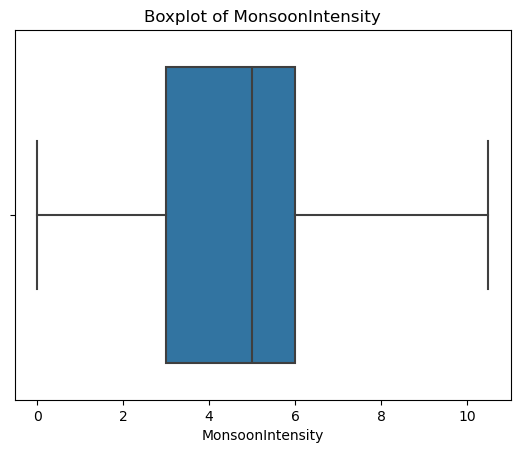

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


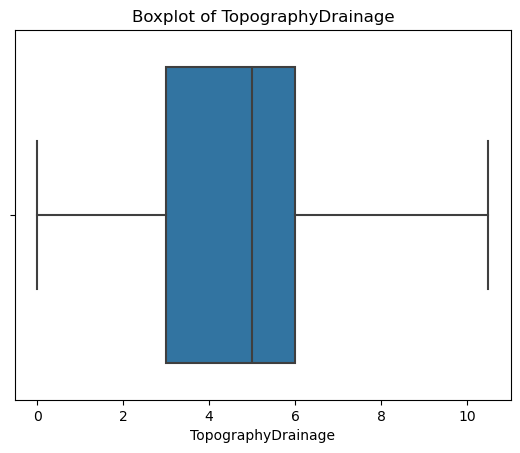

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


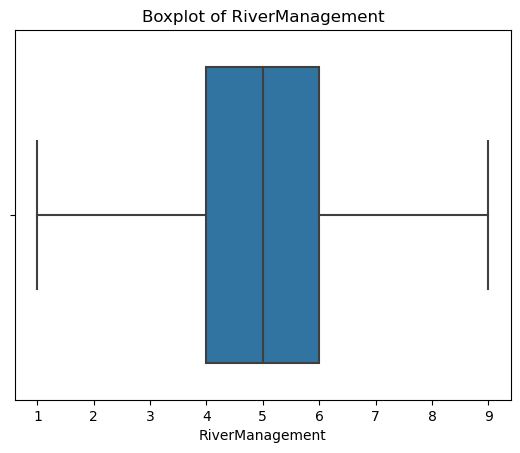

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


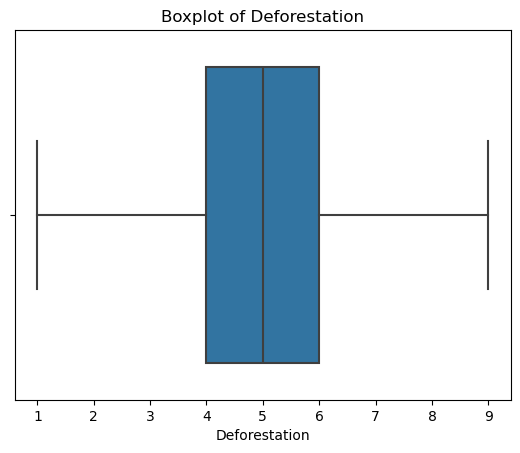

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


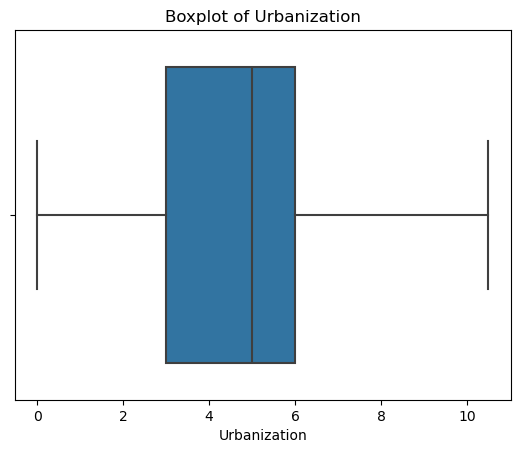

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


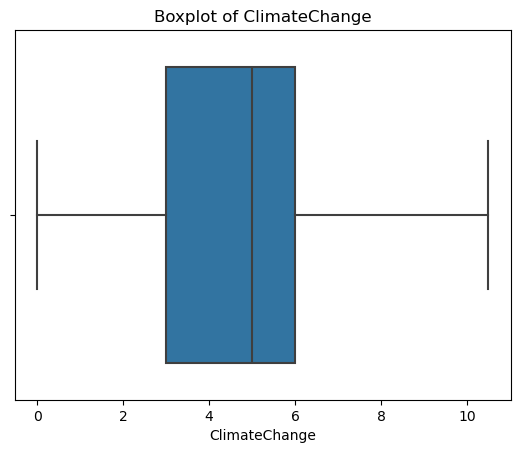

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


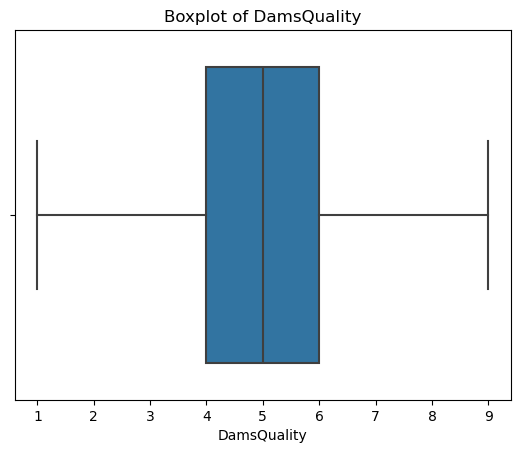

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


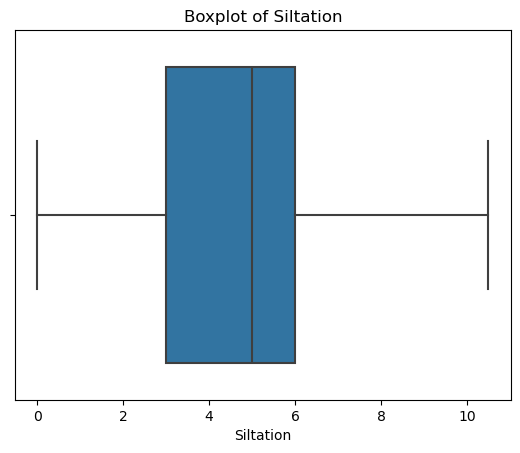

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


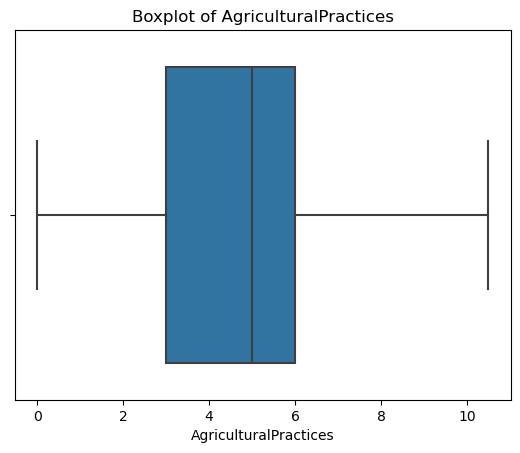

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


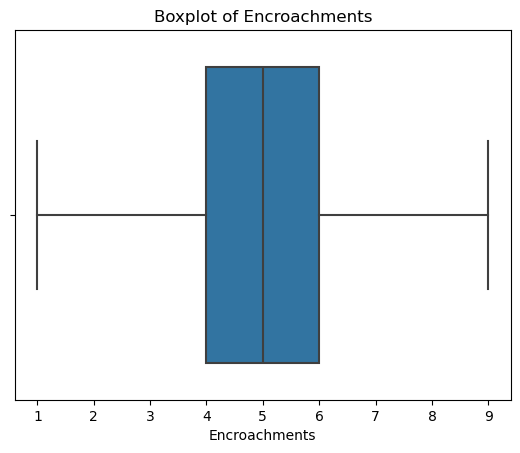

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


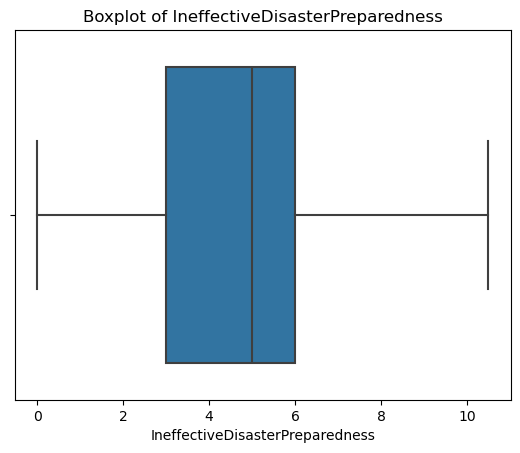

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


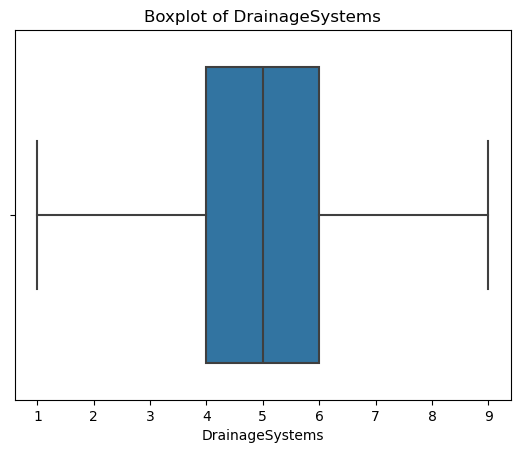

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


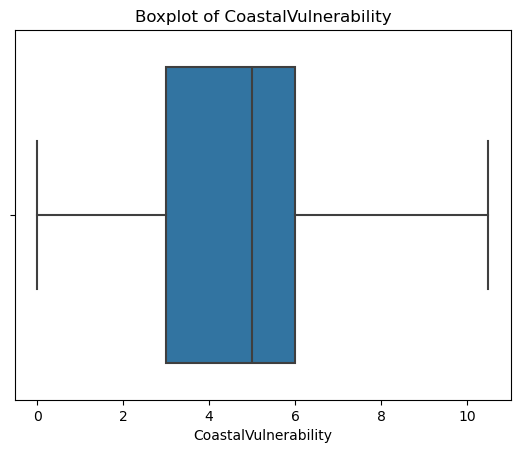

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


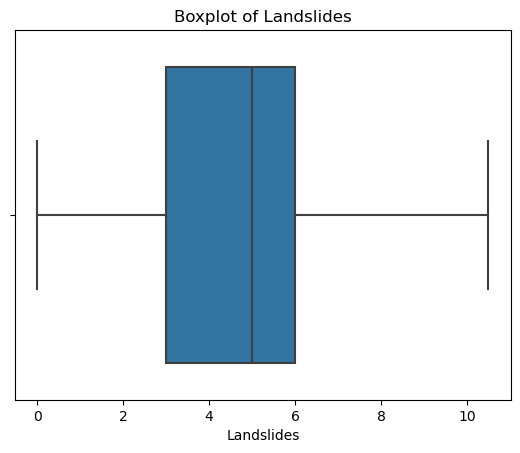

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


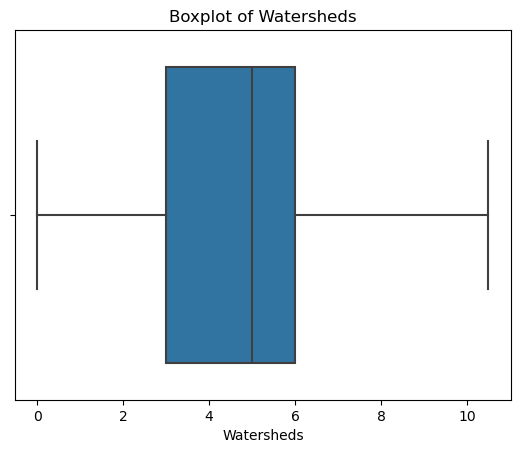

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


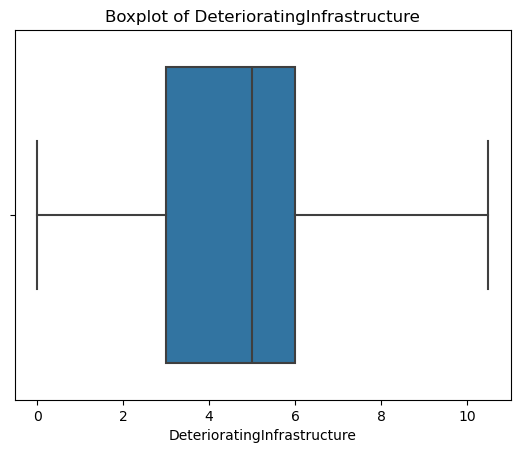

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


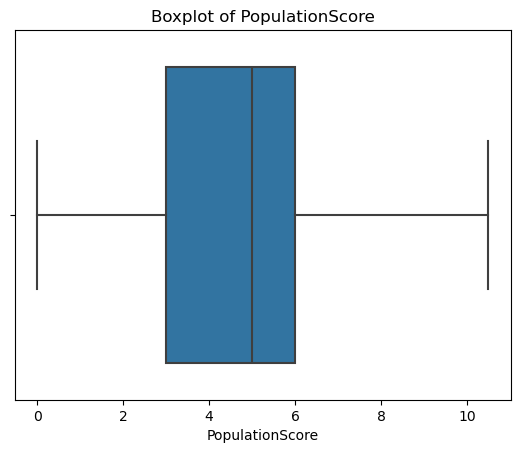

Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0


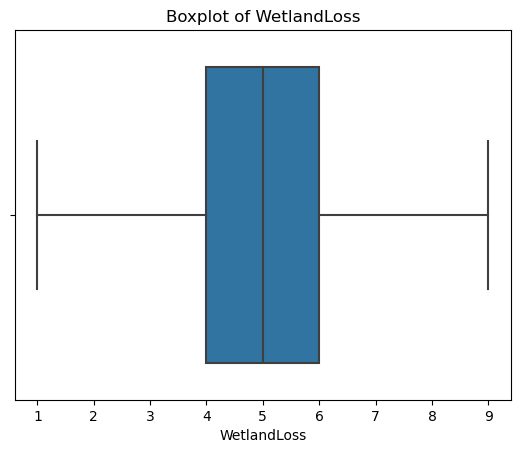

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


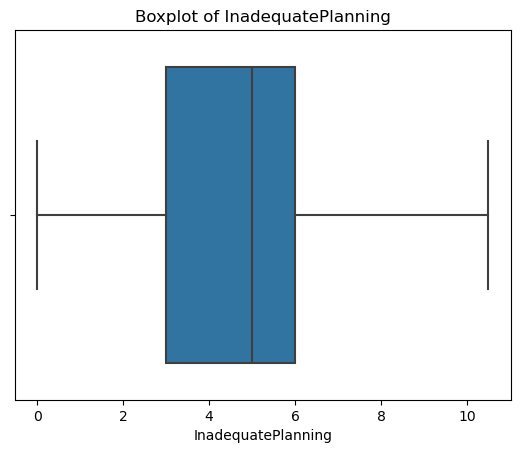

Q1: 3.0, Q3: 6.0, IQR: 3.0
Lower Bound: -1.5, Upper Bound: 10.5


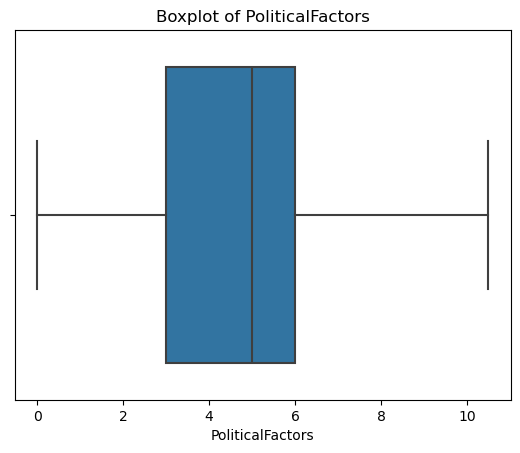

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def handle_outliers(column):
    Q1 = X_test[column].quantile(0.25)
    Q3 = X_test[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

    lbound = Q1 - 1.5 * IQR
    ubound = Q3 + 1.5 * IQR
    print(f"Lower Bound: {lbound}, Upper Bound: {ubound}")

    X_test[column] = np.where(X_test[column] > ubound, ubound,
                          np.where(X_test[column] < lbound, lbound, X_test[column]))

for col in X_test.columns:
    if pd.api.types.is_numeric_dtype(X_test[col]):
        handle_outliers(col)
        sns.boxplot(x=X_test[col])
        plt.title(f"Boxplot of {col}")
        plt.show()



In [56]:
X_train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5.0,8.0,5.0,8.0,6.0,4.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,5.0,4.0,7.0,5.0,7.0,3.0
1,6.0,7.0,4.0,4.0,8.0,8.0,3.0,5.0,4.0,6.0,9.0,7.0,2.0,0.0,3.0,5.0,3.0,3.0,4.0,3.0
2,6.0,5.0,6.0,7.0,3.0,7.0,1.0,5.0,4.0,5.0,6.0,7.0,3.0,7.0,5.0,6.0,8.0,2.0,3.0,3.0
3,3.0,4.0,6.0,5.0,4.0,8.0,4.0,7.0,6.0,8.0,5.0,2.0,4.0,7.0,4.0,4.0,6.0,5.0,7.0,5.0
4,5.0,3.0,2.0,6.0,4.0,4.0,3.0,3.0,3.0,3.0,5.0,2.0,2.0,6.0,6.0,4.0,1.0,2.0,3.0,5.0


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled = pd.DataFrame(data=X_scaled, columns=X_train.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

In [58]:
X_scaled.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0.043253,1.492285,0.037510,1.577563,0.518999,-0.455728,-0.467190,-0.941631,-0.946966,-0.463424,-1.431630,0.042479,-0.944242,-0.937193,0.038943,-0.450145,1.017275,0.040106,1.007527,-0.935677
1,0.536587,1.008150,-0.468857,-0.467242,1.492263,1.513205,-0.972456,0.039769,-0.457425,0.546406,1.980835,1.057534,-1.429839,-2.399307,-0.934778,0.040461,-0.937717,-0.974766,-0.453810,-0.935677
2,0.536587,0.039880,0.543878,1.066362,-0.940897,1.020972,-1.982987,0.039769,-0.457425,0.041491,0.518350,1.057534,-0.944242,1.012292,0.038943,0.531066,1.506023,-1.482202,-0.940922,-0.935677
3,-0.943416,-0.444255,0.543878,0.043959,-0.454265,1.513205,-0.467190,1.021169,0.521659,1.556237,0.030855,-1.480104,-0.458646,1.012292,-0.447917,-0.450145,0.528527,0.040106,1.007527,0.033865
4,0.043253,-0.928390,-1.481592,0.555160,-0.454265,-0.455728,-0.972456,-0.941631,-0.946966,-0.968339,0.030855,-1.480104,-1.429839,0.524921,0.525804,-0.450145,-1.915213,-1.482202,-0.940922,0.033865


In [59]:
X_test_scaled.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,-0.447120,0.522466,-0.977121,0.042258,0.521690,1.020656,1.548534,1.020731,1.495930,-0.464614,1.490462,0.043765,0.996265,0.039369,0.524686,-0.940657,0.528724,-0.466748,-0.454068,0.031699
1,-0.447120,-0.445999,-1.483076,2.087850,0.034501,0.036789,-0.466964,1.020731,0.030758,-0.464614,-1.430790,-0.463662,0.996265,-0.447844,0.038083,-1.921788,1.017472,-0.466748,-0.454068,-0.939773
2,-1.926207,-0.930231,0.540745,0.042258,1.008879,-1.439013,-0.466964,0.530335,-0.457633,-1.474398,1.003586,2.073475,-1.431146,0.039369,0.038083,-1.431222,-0.937521,0.549078,1.496209,-0.939773
3,-1.433178,-0.445999,-0.471166,0.553656,-0.452688,0.036789,-0.466964,-0.940855,-0.457633,-0.464614,1.003586,1.566048,-0.460181,0.526583,1.011289,0.531040,-0.448772,-1.482575,-0.454068,-0.454037
4,0.538937,-0.930231,-1.483076,-0.469140,0.521690,-0.455145,0.036910,0.039938,-0.946024,1.050063,-0.457039,-0.971090,-1.431146,0.526583,-0.448520,0.531040,1.506220,-0.466748,0.033501,0.031699


In [60]:
print("X_scaled shape:", X_scaled.shape)
print("y_train shape:", Y_train.shape)


X_scaled shape: (1117957, 20)
y_train shape: (1117957,)


In [64]:
from xgboost import  XGBRegressor

from sklearn.model_selection import train_test_split as tts

lrboost2 = XGBRegressor()

# Train the models
lrboost2.fit(X_scaled, Y_train)

pred = lrboost2.predict(X_test_scaled)

In [65]:
final = pd.DataFrame({"id":value.values,"FloodProbability":pred})
final
final.to_csv('submission.csv', index=False)

<BarContainer object of 20 artists>

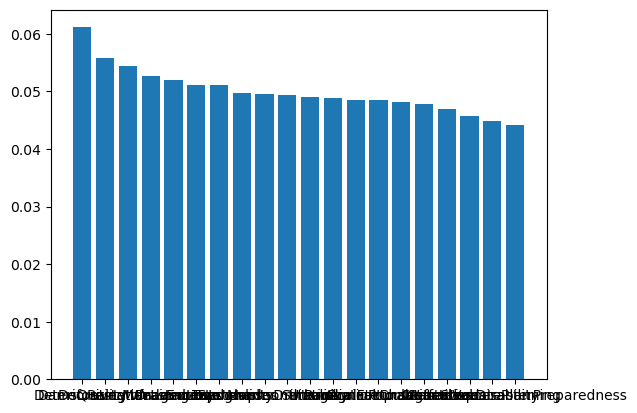

In [63]:
importances = lrboost2.feature_importances_

# Create a dataframe to view the importance ranking
feature_importance = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.bar(feature_importance["Feature"],feature_importance["Importance"])